<a href="https://colab.research.google.com/github/3hoodaas/Angular/blob/main/Ahood_ISMaster_Project2024_NVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import requests
import json
import pandas as pd
from zipfile import ZipFile
from io import BytesIO

# Function to download and parse NVD JSON
def download_nvd_data(year):
    url = f"https://nvd.nist.gov/feeds/json/cve/1.1/nvdcve-1.1-{year}.json.zip"
    response = requests.get(url)
    if response.status_code == 200:
        zip_file = ZipFile(BytesIO(response.content))
        json_file_name = zip_file.namelist()[0]  # Assuming there is only one file in the zip
        with zip_file.open(json_file_name) as json_file:
            return json.load(json_file)
    else:
        return None

# Extract relevant data from the parsed JSON
def extract_data(json_data):
    cve_items = json_data['CVE_Items']
    extracted_data = []
    for item in cve_items:
        cve_id = item['cve']['CVE_data_meta']['ID']
        description = item['cve']['description']['description_data'][0]['value']

        # Initialize optional fields with None
        attack_vector = impact_score = attack_complexity = severity = privileges_required = user_interaction = None
        cvss_score_category = combined_severity = impact_severity = published_year = None
        confidentiality_impact = integrity_impact = availability_impact = exploitability_score = None

        # Attempt to extract CVSSv3 metrics
        if 'baseMetricV3' in item['impact']:
            cvss_metrics = item['impact']['baseMetricV3']['cvssV3']
            attack_vector = cvss_metrics.get('attackVector')
            attack_complexity = cvss_metrics.get('attackComplexity')
            severity = cvss_metrics.get('baseSeverity')
            privileges_required = cvss_metrics.get('privilegesRequired')
            user_interaction = cvss_metrics.get('userInteraction')
            confidentiality_impact = cvss_metrics.get('confidentialityImpact')
            integrity_impact = cvss_metrics.get('integrityImpact')
            availability_impact = cvss_metrics.get('availabilityImpact')

            # Construct string fields
            cvss_score_category = severity
            impact_severity = f"{severity} {impact_score}"
            published_year = item['publishedDate'][:4]  # Extract the year from the published date

        extracted_data.append({
            'CVE ID': cve_id,
            'Description': description,
            'Attack Vector': attack_vector,
            'Attack Complexity': attack_complexity,
            'Severity': severity,
            'CVSS Score Category': cvss_score_category,
            'Impact Severity': impact_severity,
            'Published Year': published_year,
            'Privileges Required': privileges_required,
            'User Interaction': user_interaction,
            'Confidentiality Impact': confidentiality_impact,
            'Integrity Impact': integrity_impact,
            'Availability Impact': availability_impact,
        })
    return extracted_data

# Download and process data for multiple years
years = [2019, 2020, 2021, 2022, 2023, 2024]  # Add more years if needed
dfs = []

for year in years:
    json_data = download_nvd_data(year)
    if json_data:
        data = extract_data(json_data)
        df = pd.DataFrame(data)
        dfs.append(df)

# Concatenate DataFrames for all years
df = pd.concat(dfs, ignore_index=True)


In [156]:
df.head()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact
0,CVE-2019-0001,Receipt of a malformed packet on MX Series dev...,NETWORK,LOW,HIGH,HIGH,HIGH None,2019,NONE,NONE,NONE,NONE,HIGH
1,CVE-2019-0002,"On EX2300 and EX3400 series, stateless firewal...",NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2019,NONE,NONE,HIGH,HIGH,HIGH
2,CVE-2019-0003,When a specific BGP flowspec configuration is ...,NETWORK,HIGH,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,NONE,NONE,HIGH
3,CVE-2019-0004,"On Juniper ATP, the API key and the device key...",LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,LOW,NONE,HIGH,NONE,NONE
4,CVE-2019-0005,"On EX2300, EX3400, EX4600, QFX3K and QFX5K ser...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,NONE,LOW,NONE


In [157]:
df.tail()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact
147843,CVE-2024-9991,This vulnerability exists in Philips lighting ...,None,None,None,None,None,None,None,None,None,None,None
147844,CVE-2024-9996,A maliciously crafted DWG file when parsed in ...,LOCAL,LOW,HIGH,HIGH,HIGH None,2024,NONE,REQUIRED,HIGH,HIGH,HIGH
147845,CVE-2024-9997,A maliciously crafted DWG file when parsed in ...,LOCAL,LOW,HIGH,HIGH,HIGH None,2024,NONE,REQUIRED,HIGH,HIGH,HIGH
147846,CVE-2024-9998,Rejected reason: The vulnerability has no impa...,None,None,None,None,None,None,None,None,None,None,None
147847,CVE-2024-9999,In WS_FTP Server versions before 8.8.9 (2022.0...,None,None,None,None,None,None,None,None,None,None,None


In [158]:
#Save To csv file
df.to_csv('DataB.csv', index=False)
print("Data saved to DataB.csv successfully")

Data saved to DataB.csv successfully


In [159]:
df.shape

(147848, 13)

This dataset can be valuable for risk prioritization in several ways:

1. **CVE ID**: Each vulnerability has a unique identifier (CVE ID), allowing for easy reference and tracking of specific vulnerabilities.

2. **Attack Vector**: This column indicates how the vulnerability can be exploited, providing insight into the potential attack methods. Understanding the attack vectors helps prioritize vulnerabilities based on their exploitability and potential impact.

3. **Impact Score**: The impact score quantifies the potential impact of a vulnerability on affected systems or assets. Higher impact scores indicate vulnerabilities that could cause more significant damage or disruption.

4. **Attack Complexity**: This column describes the complexity of successfully exploiting the vulnerability. Vulnerabilities with higher attack complexity may require more sophisticated attack techniques, tools, or access privileges, impacting the ease and likelihood of exploitation.

5. **Severity**: The severity level of a vulnerability helps prioritize remediation efforts based on the perceived risk to the organization. Higher severity vulnerabilities typically pose greater risks and may require immediate attention.

6. **CVSS Score Category**: The Common Vulnerability Scoring System (CVSS) score category provides a standardized way to assess and compare the severity of vulnerabilities. It categorizes vulnerabilities into severity levels such as low, medium, or high, based on their CVSS scores.


7. **Impact Severity**: Similar to combined severity, impact severity combines severity and impact score, offering insights into the potential consequences of exploiting each vulnerability.

8. **Published Year**: Knowing the year in which vulnerabilities were published allows for historical analysis and trend identification. It helps prioritize vulnerabilities based on their recency and relevance to current systems and technologies.


In [160]:

# Save DataFrame to CSV
#csv_file_path = 'nvd_data_2020to23.csv'  # Specify your desired file path and name
#df.to_csv(csv_file_path, index=False)

#print(f"Data saved to {csv_file_path}")

In [161]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CVE ID                        0
Description                   0
Attack Vector             34370
Attack Complexity         34370
Severity                  34370
CVSS Score Category       34370
Impact Severity           34370
Published Year            34370
Privileges Required       34370
User Interaction          34370
Confidentiality Impact    34370
Integrity Impact          34370
Availability Impact       34370
dtype: int64


In [162]:
rows_with_missing_values = df[df.isnull().any(axis=1)]

In [163]:
rows_with_missing_values

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact
33,CVE-2019-0034,Rejected reason: DO NOT USE THIS CANDIDATE NUM...,None,None,None,None,None,None,None,None,None,None,None
75,CVE-2019-0087,Rejected reason: DO NOT USE THIS CANDIDATE NUM...,None,None,None,None,None,None,None,None,None,None,None
83,CVE-2019-0095,Rejected reason: DO NOT USE THIS CANDIDATE NUM...,None,None,None,None,None,None,None,None,None,None,None
88,CVE-2019-0100,Rejected reason: DO NOT USE THIS CANDIDATE NUM...,None,None,None,None,None,None,None,None,None,None,None
106,CVE-2019-0118,Rejected reason: DO NOT USE THIS CANDIDATE NUM...,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147841,CVE-2024-9989,The Crypto plugin for WordPress is vulnerable ...,None,None,None,None,None,None,None,None,None,None,None
147842,CVE-2024-9990,The Crypto plugin for WordPress is vulnerable ...,None,None,None,None,None,None,None,None,None,None,None
147843,CVE-2024-9991,This vulnerability exists in Philips lighting ...,None,None,None,None,None,None,None,None,None,None,None
147846,CVE-2024-9998,Rejected reason: The vulnerability has no impa...,None,None,None,None,None,None,None,None,None,None,None


**Start Preproccesing Dataset**

In [164]:
df.dropna(inplace=True)

In [165]:
# Remove rows with missing values in specified columns
#combined_df.dropna(subset=[ 'CVE ID', 'Description', 'Attack Vector', 'Attack Complexity', 'Severity', 'CVSS Score Category', 'Published Year', 'Privileges Required', 'User Interaction', 'Confidentiality Impact', 'Integrity Impact', 'Availability Impact', 'Impact Severity'], inplace=True)
##'Vendor', 'Product', 'CWE ID', 'Base Score', 'Exploitability Score', 'Vector String', 'Description Length', 'Description Complexity'

In [166]:
df.shape

(113478, 13)

In [167]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CVE ID                    0
Description               0
Attack Vector             0
Attack Complexity         0
Severity                  0
CVSS Score Category       0
Impact Severity           0
Published Year            0
Privileges Required       0
User Interaction          0
Confidentiality Impact    0
Integrity Impact          0
Availability Impact       0
dtype: int64


In [168]:
df.head()


,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact
0,CVE-2019-0001,Receipt of a malformed packet on MX Series dev...,NETWORK,LOW,HIGH,HIGH,HIGH None,2019,NONE,NONE,NONE,NONE,HIGH
1,CVE-2019-0002,"On EX2300 and EX3400 series, stateless firewal...",NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2019,NONE,NONE,HIGH,HIGH,HIGH
2,CVE-2019-0003,When a specific BGP flowspec configuration is ...,NETWORK,HIGH,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,NONE,NONE,HIGH
3,CVE-2019-0004,"On Juniper ATP, the API key and the device key...",LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,LOW,NONE,HIGH,NONE,NONE
4,CVE-2019-0005,"On EX2300, EX3400, EX4600, QFX3K and QFX5K ser...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,NONE,LOW,NONE


In [169]:
df.tail()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact
147837,CVE-2024-9985,Enterprise Cloud Database from Ragic does not ...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2024,NONE,NONE,HIGH,HIGH,HIGH
147838,CVE-2024-9986,A vulnerability was found in code-projects Blo...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2024,NONE,NONE,HIGH,HIGH,HIGH
147839,CVE-2024-9987,A post-authentication SQL Injection vulnerabil...,NETWORK,LOW,HIGH,HIGH,HIGH None,2024,LOW,NONE,HIGH,HIGH,HIGH
147844,CVE-2024-9996,A maliciously crafted DWG file when parsed in ...,LOCAL,LOW,HIGH,HIGH,HIGH None,2024,NONE,REQUIRED,HIGH,HIGH,HIGH
147845,CVE-2024-9997,A maliciously crafted DWG file when parsed in ...,LOCAL,LOW,HIGH,HIGH,HIGH None,2024,NONE,REQUIRED,HIGH,HIGH,HIGH


In [170]:
df.shape

(113478, 13)

In [171]:
print("Number of data rows:", df.shape[0])

Number of data rows: 113478


In [172]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CVE ID                    0
Description               0
Attack Vector             0
Attack Complexity         0
Severity                  0
CVSS Score Category       0
Impact Severity           0
Published Year            0
Privileges Required       0
User Interaction          0
Confidentiality Impact    0
Integrity Impact          0
Availability Impact       0
dtype: int64


In [173]:
df.columns.tolist()

['CVE ID',
 'Description',
 'Attack Vector',
 'Attack Complexity',
 'Severity',
 'CVSS Score Category',
 'Impact Severity',
 'Published Year',
 'Privileges Required',
 'User Interaction',
 'Confidentiality Impact',
 'Integrity Impact',
 'Availability Impact']

In [174]:
df["Attack Vector"].unique()

array(['NETWORK', 'LOCAL', 'ADJACENT_NETWORK', 'PHYSICAL'], dtype=object)

In [175]:
df["Attack Complexity"].unique()

array(['LOW', 'HIGH'], dtype=object)

In [176]:
df["Severity"].unique()

array(['HIGH', 'CRITICAL', 'MEDIUM', 'LOW'], dtype=object)

In [177]:
df["CVSS Score Category"].unique()

array(['HIGH', 'CRITICAL', 'MEDIUM', 'LOW'], dtype=object)

In [178]:
df["Impact Severity"].unique()

array(['HIGH None', 'CRITICAL None', 'MEDIUM None', 'LOW None'],
      dtype=object)

In [179]:
df["Published Year"].unique()

array(['2019', '2020', '2021', '2022', '2023', '2024'], dtype=object)

In [180]:
df["Privileges Required"].unique()

array(['NONE', 'LOW', 'HIGH'], dtype=object)

In [181]:
df["User Interaction"].unique()

array(['NONE', 'REQUIRED'], dtype=object)

In [182]:
df["Confidentiality Impact"].unique()

array(['NONE', 'HIGH', 'LOW'], dtype=object)

In [183]:
df["Integrity Impact"].unique()

array(['NONE', 'HIGH', 'LOW'], dtype=object)

In [184]:
df["Availability Impact"].unique()

array(['HIGH', 'NONE', 'LOW'], dtype=object)

Severity Distribution:
 Severity
MEDIUM      49262
HIGH        44809
CRITICAL    17343
LOW          2064
Name: count, dtype: int64


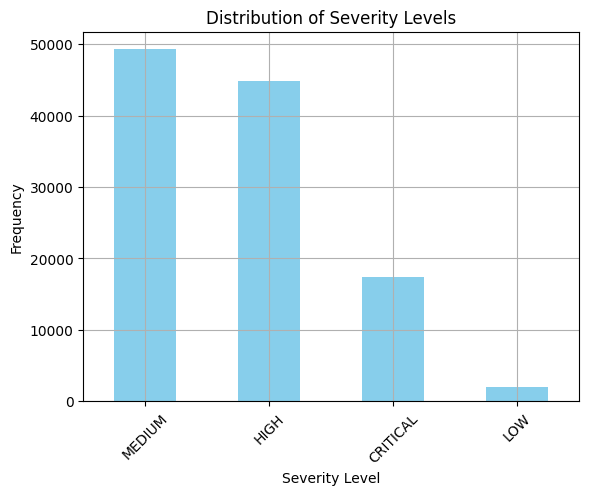

In [185]:
import matplotlib.pyplot as plt

# Check the distribution of the 'Severity' column
severity_distribution = df['Severity'].value_counts()
print("Severity Distribution:\n", severity_distribution)

# Plot the distribution
severity_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [186]:
import pandas as pd

# Filter out the 'LOW' severity class
filtered_df = df[df['Severity'] != 'LOW']

# Sample 9500 instances from each of the remaining classes, or the entire subset if it's smaller
sampled_df = pd.DataFrame()  # Initialize an empty DataFrame to hold sampled data
for severity in ['MEDIUM', 'HIGH', 'CRITICAL']:
    subset = filtered_df[filtered_df['Severity'] == severity]
    # Get the smaller value between 9500 and the subset size
    sample_size = min(17000, len(subset))
    sample = subset.sample(n=sample_size, random_state=42)  # Ensure reproducibility with a fixed random state
    sampled_df = pd.concat([sampled_df, sample], axis=0)  # Append the sampled subset

# Reset index of the new DataFrame
sampled_df = sampled_df.reset_index(drop=True)

# Display the new distribution
print("New Severity Distribution:\n", sampled_df['Severity'].value_counts())

##import pandas as pd

# Filter out the 'LOW' severity class
##filtered_df = df[df['Severity'] != 'LOW']

# Sample 9500 instances from each of the remaining classes
##sampled_df = pd.DataFrame()  # Initialize an empty DataFrame to hold sampled data
##for severity in ['MEDIUM', 'HIGH', 'CRITICAL']:
  ##  subset = filtered_df[filtered_df['Severity'] == severity]
    ##sample = subset.sample(n=9500, random_state=42)  # Ensure reproducibility with a fixed random state
    ##sampled_df = pd.concat([sampled_df, sample], axis=0)  # Append the sampled subset

# Reset index of the new DataFrame
##sampled_df = sampled_df.reset_index(drop=True)

# Display the new distribution
##print("New Severity Distribution:\n", sampled_df['Severity'].value_counts())


New Severity Distribution:
 Severity
MEDIUM      17000
HIGH        17000
CRITICAL    17000
Name: count, dtype: int64


Severity Distribution:
 Severity
MEDIUM      17000
HIGH        17000
CRITICAL    17000
Name: count, dtype: int64


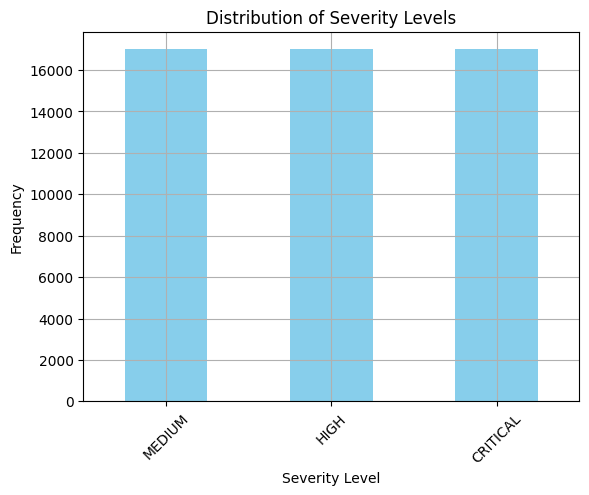

In [187]:
# Check the distribution of the 'Severity' column
severity_distribution = sampled_df['Severity'].value_counts()
print("Severity Distribution:\n", severity_distribution)

# Plot the distribution
severity_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [188]:
sampled_df.shape

(51000, 13)

In [189]:
sampled_df.head()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact
0,CVE-2023-34042,The spring-security.xsd file inside the \nspri...,LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,LOW,NONE,NONE,HIGH,NONE
1,CVE-2021-46390,An access control issue in the authentication ...,PHYSICAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2022,NONE,NONE,HIGH,HIGH,HIGH
2,CVE-2019-20528,Ignite Realtime Openfire 4.4.1 allows XSS via ...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2020,NONE,REQUIRED,LOW,LOW,NONE
3,CVE-2019-3423,"permission and access control vulnerability, w...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,LOW,NONE,NONE
4,CVE-2023-26283,IBM WebSphere Application Server 9.0 is vulner...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2023,LOW,REQUIRED,LOW,LOW,NONE


In [190]:
sampled_df.tail()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact
50995,CVE-2022-37397,An issue was discovered in the YugabyteDB 2.6....,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2022,NONE,NONE,HIGH,HIGH,HIGH
50996,CVE-2022-43782,Affected versions of Atlassian Crowd allow an ...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2022,NONE,NONE,HIGH,HIGH,HIGH
50997,CVE-2023-33271,An issue was discovered in DTS Monitoring 3.57...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH
50998,CVE-2023-33626,"D-Link DIR-600 Hardware Version B5, Firmware V...",NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH
50999,CVE-2022-45297,EQ v1.5.31 to v2.2.0 was discovered to contain...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH


In [191]:
sampled_df.isnull().sum()

,0
CVE ID,0
Description,0
Attack Vector,0
Attack Complexity,0
Severity,0
CVSS Score Category,0
Impact Severity,0
Published Year,0
Privileges Required,0
User Interaction,0


**Calculate "Likelihood" column**

In [192]:
import pandas as pd

# Define the scores for vector and complexity
vector_scores = {'NETWORK': 1.000, 'LOCAL': 0.395, 'ADJACENT_NETWORK': 0.646}
complexity_scores = {'LOW': 0.710, 'HIGH': 0.350}


# Function to calculate the likelihood
def calculate_likelihood(row):
    vector_score = vector_scores.get(row['Attack Vector'], 0)  # Default to 0 if not found
    complexity_score = complexity_scores.get(row['Attack Complexity'], 0)  # Default to 0 if not found
    # Assuming higher scores indicate higher likelihood
    return vector_score * complexity_score

# Apply the function to the DataFrame to create a new column 'likelihood'
sampled_df['Likelihood'] = sampled_df.apply(calculate_likelihood, axis=1)




In [193]:
sampled_df.head(20)

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact,Likelihood
0,CVE-2023-34042,The spring-security.xsd file inside the \nspri...,LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,LOW,NONE,NONE,HIGH,NONE,0.28045
1,CVE-2021-46390,An access control issue in the authentication ...,PHYSICAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.00000
2,CVE-2019-20528,Ignite Realtime Openfire 4.4.1 allows XSS via ...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2020,NONE,REQUIRED,LOW,LOW,NONE,0.71000
3,CVE-2019-3423,"permission and access control vulnerability, w...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,LOW,NONE,NONE,0.71000
4,CVE-2023-26283,IBM WebSphere Application Server 9.0 is vulner...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2023,LOW,REQUIRED,LOW,LOW,NONE,0.71000
5,CVE-2020-12402,"During RSA key generation, bignum implementati...",LOCAL,HIGH,MEDIUM,MEDIUM,MEDIUM None,2020,LOW,REQUIRED,HIGH,NONE,NONE,0.13825
6,CVE-2022-37342,Authenticated (admin+) Stored Cross-Site Scrip...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2022,HIGH,REQUIRED,LOW,LOW,NONE,0.71000
7,CVE-2023-20260,A vulnerability in the application CLI of Cisc...,LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,HIGH,NONE,HIGH,HIGH,HIGH,0.28045
8,CVE-2023-1631,"A vulnerability, which was classified as probl...",LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2023,LOW,NONE,NONE,NONE,HIGH,0.28045
9,CVE-2024-20960,Vulnerability in the MySQL Server product of O...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,LOW,NONE,NONE,NONE,HIGH,0.71000


**Mapping**

In [194]:
#This was 5 for critical 4 for high and 3 for medium,
#I have now only three class.
#Would it be okay to code it 3, 2, 1????????????????? Yes, but I dont do it.

import pandas as pd


# Define a function to map CVSS v3.0 string categories to severity scores, excluding 'LOW'
def cvss_v3_to_severity_score(category):
    if category == 'CRITICAL':
        return 5  # Critical
    elif category == 'HIGH':
        return 4  # High
    elif category == 'MEDIUM':
        return 3  # Medium
    else:
        return None  # None for 'LOW' or any other category not included

# Apply the mapping to the 'CVSS Score Category' column to create a new 'Severity Score' column
sampled_df['Severity Score'] = sampled_df['CVSS Score Category'].apply(cvss_v3_to_severity_score)

#The previous line applies the function cvss_v3_to_severity_score to the 'CVSS Score Category' column in the sampled_df DataFrame.
#It converts each severity category (e.g., 'CRITICAL', 'HIGH', 'MEDIUM') in the column into its respective numerical score.
#The resulting scores are stored in a new column called 'Severity Score' in the same DataFrame.

#After running this code, the sampled_df DataFrame will have an additional column, 'Severity Score', where:
#'CRITICAL' is represented as 5.
#'HIGH' is represented as 4.
#'MEDIUM' is represented as 3.
#Categories like 'LOW' or missing values are represented as None.




In [195]:
sampled_df.tail()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact,Likelihood,Severity Score
50995,CVE-2022-37397,An issue was discovered in the YugabyteDB 2.6....,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.71,5
50996,CVE-2022-43782,Affected versions of Atlassian Crowd allow an ...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.71,5
50997,CVE-2023-33271,An issue was discovered in DTS Monitoring 3.57...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5
50998,CVE-2023-33626,"D-Link DIR-600 Hardware Version B5, Firmware V...",NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5
50999,CVE-2022-45297,EQ v1.5.31 to v2.2.0 was discovered to contain...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5


In [196]:
sampled_df.head()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact,Likelihood,Severity Score
0,CVE-2023-34042,The spring-security.xsd file inside the \nspri...,LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,LOW,NONE,NONE,HIGH,NONE,0.28045,3
1,CVE-2021-46390,An access control issue in the authentication ...,PHYSICAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.00000,3
2,CVE-2019-20528,Ignite Realtime Openfire 4.4.1 allows XSS via ...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2020,NONE,REQUIRED,LOW,LOW,NONE,0.71000,3
3,CVE-2019-3423,"permission and access control vulnerability, w...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,LOW,NONE,NONE,0.71000,3
4,CVE-2023-26283,IBM WebSphere Application Server 9.0 is vulner...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2023,LOW,REQUIRED,LOW,LOW,NONE,0.71000,3


In [197]:
sampled_df["Severity Score"].unique()

array([3, 4, 5])

In [198]:
sampled_df.dtypes

,0
CVE ID,object
Description,object
Attack Vector,object
Attack Complexity,object
Severity,object
CVSS Score Category,object
Impact Severity,object
Published Year,object
Privileges Required,object
User Interaction,object


**Calculate "Risk Score" Formula, to give weights for likelihood and impact to enhance risk prioritization model**

In [199]:
import pandas as pd

# Define the weights for likelihood and severity
w1 = 0.40  # Weight for probability (likelihood)
w2 = 0.60  # Weight for severity (larger weight because severity often has a greater impact on risk)

#w1 and w2 are weights used to calculate the Risk Score.
#w1 gives a 40% weight to likelihood (the probability of an exploit occurring).
#w2 gives a 60% weight to severity (the potential impact of the exploit).
#Reason for weights: Severity is given a higher weight because the impact of a vulnerability is often considered more critical in risk assessments.

# Calculate risk score based on likelihood and severity
def calculate_risk_score(row, w1, w2):
    likelihood_score = row['Likelihood']
    severity_score = row['Severity Score']
    #row: A row of the DataFrame containing Likelihood and Severity Score.
    #w1 and w2: Weights for likelihood and severity.

    # If the severity score is the maximum (which is 5 for 'CRITICAL'), set the risk score to 1
    if severity_score == 5:
        return 1
    else:
        # Otherwise, calculate the weighted sum of likelihood and severity
        return w1 * likelihood_score + w2 * severity_score / 5  # Divide severity_score by 5 to normalize it to a 0-1 scale

# Apply the risk score calculation to the DataFrame
sampled_df['Risk Score'] = sampled_df.apply(lambda row: calculate_risk_score(row, w1, w2), axis=1)
#Applies the calculate_risk_score function to each row of the DataFrame sampled_df.
#Adds a new column 'Risk Score' to store the calculated scores.

# Define the function to categorize risk
#Inputs: risk_score (calculated in the previous step).

def categorize_risk(risk_score):
    if risk_score == 1:
        return 'Severe'
    elif risk_score >= 0.65:
        return 'High'
    elif risk_score >= 0.35:
        return 'Moderate'
    else:
        return 'Low'

# Apply risk categorization
sampled_df['Risk Category'] = sampled_df['Risk Score'].apply(categorize_risk)
#Applies the categorize_risk function to the 'Risk Score' column in sampled_df.
#Adds a new column 'Risk Category' to store the assigned categories.


In [200]:
sampled_df.head()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact,Likelihood,Severity Score,Risk Score,Risk Category
0,CVE-2023-34042,The spring-security.xsd file inside the \nspri...,LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,LOW,NONE,NONE,HIGH,NONE,0.28045,3,0.47218,Moderate
1,CVE-2021-46390,An access control issue in the authentication ...,PHYSICAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.00000,3,0.36000,Moderate
2,CVE-2019-20528,Ignite Realtime Openfire 4.4.1 allows XSS via ...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2020,NONE,REQUIRED,LOW,LOW,NONE,0.71000,3,0.64400,Moderate
3,CVE-2019-3423,"permission and access control vulnerability, w...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,LOW,NONE,NONE,0.71000,3,0.64400,Moderate
4,CVE-2023-26283,IBM WebSphere Application Server 9.0 is vulner...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2023,LOW,REQUIRED,LOW,LOW,NONE,0.71000,3,0.64400,Moderate


In [201]:
# Display the updated DataFrame with the risk scores and categories
sampled_df.head()


,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact,Likelihood,Severity Score,Risk Score,Risk Category
0,CVE-2023-34042,The spring-security.xsd file inside the \nspri...,LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,LOW,NONE,NONE,HIGH,NONE,0.28045,3,0.47218,Moderate
1,CVE-2021-46390,An access control issue in the authentication ...,PHYSICAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.00000,3,0.36000,Moderate
2,CVE-2019-20528,Ignite Realtime Openfire 4.4.1 allows XSS via ...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2020,NONE,REQUIRED,LOW,LOW,NONE,0.71000,3,0.64400,Moderate
3,CVE-2019-3423,"permission and access control vulnerability, w...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,LOW,NONE,NONE,0.71000,3,0.64400,Moderate
4,CVE-2023-26283,IBM WebSphere Application Server 9.0 is vulner...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2023,LOW,REQUIRED,LOW,LOW,NONE,0.71000,3,0.64400,Moderate


In [202]:
sampled_df.tail()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact,Likelihood,Severity Score,Risk Score,Risk Category
50995,CVE-2022-37397,An issue was discovered in the YugabyteDB 2.6....,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe
50996,CVE-2022-43782,Affected versions of Atlassian Crowd allow an ...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe
50997,CVE-2023-33271,An issue was discovered in DTS Monitoring 3.57...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe
50998,CVE-2023-33626,"D-Link DIR-600 Hardware Version B5, Firmware V...",NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe
50999,CVE-2022-45297,EQ v1.5.31 to v2.2.0 was discovered to contain...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe


In [203]:
import pandas as pd

# Define a mapping from risk categories to a numeric ranking
category_to_ranking = {
    'Severe': 1,
    'High': 2,
    'Moderate': 3,
    ##'Low': 4
}
#This dictionary maps each risk category (e.g., Severe, High, Moderate) to a numeric ranking:
#'Severe' gets the highest priority with a ranking of 1.
#'High' is assigned a ranking of 2.
#'Moderate' is assigned a ranking of 3.
#By default (if not explicitly mapped), 'Low' or other unspecified values will be ranked as 4.
#Purpose: To convert categorical values (e.g., 'Severe', 'High') into numeric rankings for easier sorting and processing.

# Apply the mapping to the 'risk_category' column to create the 'risk_priority_ranking' column
sampled_df['Risk_Priority_Ranking'] = sampled_df['Risk Category'].apply(lambda x: category_to_ranking.get(x, 4))

# The DataFrame now has a new column 'risk_priority_ranking' with numeric rankings based on the category
# Sort the DataFrame by this new column to prioritize the risks
df_sorted = sampled_df.sort_values(by='Risk_Priority_Ranking')

In [204]:
sampled_df.head()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact,Likelihood,Severity Score,Risk Score,Risk Category,Risk_Priority_Ranking
0,CVE-2023-34042,The spring-security.xsd file inside the \nspri...,LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,LOW,NONE,NONE,HIGH,NONE,0.28045,3,0.47218,Moderate,3
1,CVE-2021-46390,An access control issue in the authentication ...,PHYSICAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.00000,3,0.36000,Moderate,3
2,CVE-2019-20528,Ignite Realtime Openfire 4.4.1 allows XSS via ...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2020,NONE,REQUIRED,LOW,LOW,NONE,0.71000,3,0.64400,Moderate,3
3,CVE-2019-3423,"permission and access control vulnerability, w...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,LOW,NONE,NONE,0.71000,3,0.64400,Moderate,3
4,CVE-2023-26283,IBM WebSphere Application Server 9.0 is vulner...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2023,LOW,REQUIRED,LOW,LOW,NONE,0.71000,3,0.64400,Moderate,3


In [205]:
sampled_df.tail()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,Confidentiality Impact,Integrity Impact,Availability Impact,Likelihood,Severity Score,Risk Score,Risk Category,Risk_Priority_Ranking
50995,CVE-2022-37397,An issue was discovered in the YugabyteDB 2.6....,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe,1
50996,CVE-2022-43782,Affected versions of Atlassian Crowd allow an ...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2022,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe,1
50997,CVE-2023-33271,An issue was discovered in DTS Monitoring 3.57...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe,1
50998,CVE-2023-33626,"D-Link DIR-600 Hardware Version B5, Firmware V...",NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe,1
50999,CVE-2022-45297,EQ v1.5.31 to v2.2.0 was discovered to contain...,NETWORK,LOW,CRITICAL,CRITICAL,CRITICAL None,2023,NONE,NONE,HIGH,HIGH,HIGH,0.71,5,1.0,Severe,1


**Calculate "Exploitability" column**

In [206]:
# Define mappings for categorical to numerical values
vector_mapping = {'NETWORK': 1.000, 'LOCAL': 0.395, 'ADJACENT_NETWORK': 0.646, 'PHYSICAL': 0.1}##Check? PHYSICAL=0.1???
complexity_mapping = {'LOW': 0.710, 'HIGH': 0.350}
authentication_mapping = {'NONE': 0.704, 'LOW': 0.560, 'HIGH': 0.450} ##Check? NONE=NONE, SINGLE=LOW, MULTIPLE=HIGH, Yes
impact_mapping = {"HIGH": 0.660, "NONE": 0.000, "LOW": 0.275} ##Check? NONE=NONE, Partial=LOW, Complete=HIGH, Yes



# Calculate Exploitability Score
sampled_df['Num_AttackVector'] = sampled_df['Attack Vector'].map(vector_mapping)
sampled_df['Num_AttackComplexity'] = sampled_df['Attack Complexity'].map(complexity_mapping)
sampled_df['Num_Authentication'] = sampled_df['Privileges Required'].map(authentication_mapping)  # Assuming Authentication from Privileges Required
sampled_df['Exploitability'] = 20 * sampled_df['Num_AttackVector'] * sampled_df['Num_AttackComplexity'] * sampled_df['Num_Authentication']

# Calculate Impact Score
sampled_df['Num_Confidentiality'] = sampled_df['Confidentiality Impact'].map(impact_mapping)
sampled_df['Num_Integrity'] = sampled_df['Integrity Impact'].map(impact_mapping)
sampled_df['Num_Availability'] = sampled_df['Availability Impact'].map(impact_mapping)
sampled_df['Impact'] = 10.41 * (1 - (1 - sampled_df['Num_Confidentiality']) * (1 - sampled_df['Num_Integrity']) * (1 - sampled_df['Num_Availability']))


In [207]:
sampled_df.head()

,CVE ID,Description,Attack Vector,Attack Complexity,Severity,CVSS Score Category,Impact Severity,Published Year,Privileges Required,User Interaction,...,Risk Category,Risk_Priority_Ranking,Num_AttackVector,Num_AttackComplexity,Num_Authentication,Exploitability,Num_Confidentiality,Num_Integrity,Num_Availability,Impact
0,CVE-2023-34042,The spring-security.xsd file inside the \nspri...,LOCAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2024,LOW,NONE,...,Moderate,3,0.395,0.71,0.560,3.14104,0.000,0.660,0.00,6.870600
1,CVE-2021-46390,An access control issue in the authentication ...,PHYSICAL,LOW,MEDIUM,MEDIUM,MEDIUM None,2022,NONE,NONE,...,Moderate,3,0.100,0.71,0.704,0.99968,0.660,0.660,0.66,10.000845
2,CVE-2019-20528,Ignite Realtime Openfire 4.4.1 allows XSS via ...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2020,NONE,REQUIRED,...,Moderate,3,1.000,0.71,0.704,9.99680,0.275,0.275,0.00,4.938244
3,CVE-2019-3423,"permission and access control vulnerability, w...",NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2019,NONE,NONE,...,Moderate,3,1.000,0.71,0.704,9.99680,0.275,0.000,0.00,2.862750
4,CVE-2023-26283,IBM WebSphere Application Server 9.0 is vulner...,NETWORK,LOW,MEDIUM,MEDIUM,MEDIUM None,2023,LOW,REQUIRED,...,Moderate,3,1.000,0.71,0.560,7.95200,0.275,0.275,0.00,4.938244


In [208]:
sampled_df.isnull().sum()

,0
CVE ID,0
Description,0
Attack Vector,0
Attack Complexity,0
Severity,0
CVSS Score Category,0
Impact Severity,0
Published Year,0
Privileges Required,0
User Interaction,0


In [209]:
#Save To csv file
sampled_df.to_csv('DataA.csv', index=False)
print("Data saved to DataA.csv successfully")

Data saved to DataA.csv successfully


**Machine Learning**

**SVM with confiusion matrix:**

              precision    recall  f1-score   support

           1       1.00      0.95      0.98      3332
           2       0.93      0.98      0.96      2284
           3       0.99      1.00      0.99      4584

    accuracy                           0.98     10200
   macro avg       0.97      0.98      0.97     10200
weighted avg       0.98      0.98      0.98     10200

Accuracy: 0.9788235294117648


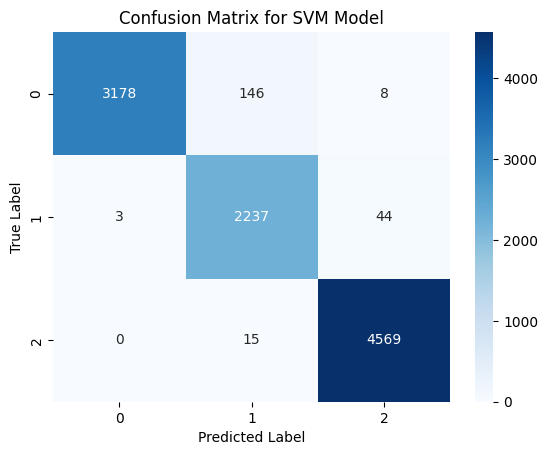

False Positives per class: [  3 161  52]
False Negatives per class: [154  47  15]
True Positives per class: [3178 2237 4569]
True Negatives per class: [6865 7755 5564]


In [210]:
#SVM
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Encode categorical variables
label_encoders = {}
for column in ['Attack Vector', 'Attack Complexity', 'Privileges Required', 'User Interaction']:
    le = LabelEncoder()
    sampled_df[column] = le.fit_transform(sampled_df[column].astype(str))
    label_encoders[column] = le

# Impute missing values
# Already done

# Feature selection
features = sampled_df[['Exploitability', 'Impact', 'Likelihood', 'Privileges Required', 'User Interaction']]
target = sampled_df['Risk_Priority_Ranking']

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Predictions and evaluations
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Annotate False Positives and False Negatives
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False positives are the sum of the column minus the diagonal
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # False negatives are the sum of the row minus the diagonal
TP = np.diag(conf_matrix)  # True positives are the diagonal elements
TN = conf_matrix.sum() - (FP + FN + TP)  # True negatives are the total sum of matrix minus (FP + FN + TP)

print('False Positives per class:', FP)
print('False Negatives per class:', FN)
print('True Positives per class:', TP)
print('True Negatives per class:', TN)



**Feature Importance**
Technique Name: Coefficient Analysis (or Weight Analysis) in Linear Models:
The technique used to determine which features are most important in a linear model, like a Support Vector Machine (SVM) with a linear kernel, is called Coefficient Analysis.

In simple terms: This technique looks at the "weights" or "coefficients" assigned to each feature by the model. The bigger the weight, the more important that feature is in making predictions. So, by checking these weights, you can figure out which features (like severity, exploitability, etc.) are the most important in your model.

In [211]:
import numpy as np
import pandas as pd

# Assuming model is trained and has attribute 'coef_'
if hasattr(model, "coef_"):
    # Get absolute values of coefficients and average them across all classes (rows)
    avg_coefficients = np.abs(model.coef_).mean(axis=0)

    # Mapping averaged coefficients to their respective feature names
    feature_importance = pd.Series(avg_coefficients, index=features.columns)

    # Displaying the coefficients sorted by importance
    print("Feature Importances:")
    print(feature_importance.sort_values(ascending=False))
else:
    print("Feature importances are not available. Ensure the kernel is 'linear' and the model is trained.")



Feature Importances:
Exploitability         5.791665
Impact                 3.730397
Likelihood             2.732647
Privileges Required    1.216910
User Interaction       1.084089
dtype: float64


In [212]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Create an SVM model with a linear kernel
model_cv = SVC(kernel='linear')

# Step 2: Scale features
scaler = StandardScaler()

# Step 3: Perform cross-validation
scores = cross_val_score(model_cv, scaler.fit_transform(features), target, cv=10)

# Step 4: Output results
print("Cross-validated scores:", scores)
print("Average score:", np.mean(scores))


Cross-validated scores: [0.97588235 0.97960784 0.97490196 0.9745098  0.97823529 0.97470588
 0.97607843 0.97862745 0.98019608 0.98058824]
Average score: 0.9773333333333334


**Random Forest with confiusion matrix:**

              precision    recall  f1-score   support

           1       0.99      0.97      0.98      3332
           2       0.95      0.98      0.96      2284
           3       0.99      1.00      1.00      4584

    accuracy                           0.98     10200
   macro avg       0.98      0.98      0.98     10200
weighted avg       0.98      0.98      0.98     10200

Accuracy: 0.9833333333333333


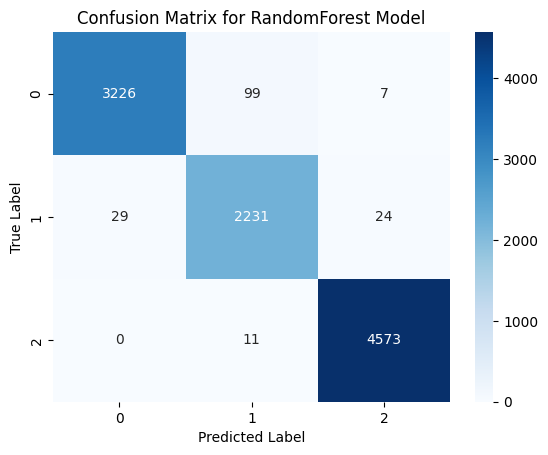

False Positives per class: [ 29 110  31]
False Negatives per class: [106  53  11]
True Positives per class: [3226 2231 4573]
True Negatives per class: [6839 7806 5585]


In [213]:
#Random Forest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Encode categorical variables
label_encoders = {}
for column in ['Attack Vector', 'Attack Complexity', 'Privileges Required', 'User Interaction']:
    le = LabelEncoder()
    sampled_df[column] = le.fit_transform(sampled_df[column].astype(str))
    label_encoders[column] = le

# Impute missing values
# Already done

# Feature selection
features = sampled_df[['Exploitability', 'Impact', 'Likelihood', 'Privileges Required', 'User Interaction']]
target = sampled_df['Risk_Priority_Ranking']

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluations
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Annotate False Positives and False Negatives
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False positives are the sum of the column minus the diagonal
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # False negatives are the sum of the row minus the diagonal
TP = np.diag(conf_matrix)  # True positives are the diagonal elements
TN = conf_matrix.sum() - (FP + FN + TP)  # True negatives are the total sum of matrix minus (FP + FN + TP)

print('False Positives per class:', FP)
print('False Negatives per class:', FN)
print('True Positives per class:', TP)
print('True Negatives per class:', TN)


**To Analyze the confiusion matrix:**

In [214]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Define the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Setup 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Perform cross-validation
cv_results = cross_val_score(model, features, target, cv=kf, scoring='accuracy')

# Step 4: Output results
print("CV Accuracy Scores:", cv_results)
print("Mean CV Accuracy:", np.mean(cv_results))

CV Accuracy Scores: [0.98333333 0.9822549  0.97892157 0.98294118 0.98235294]
Mean CV Accuracy: 0.9819607843137254


**Deep Learning**


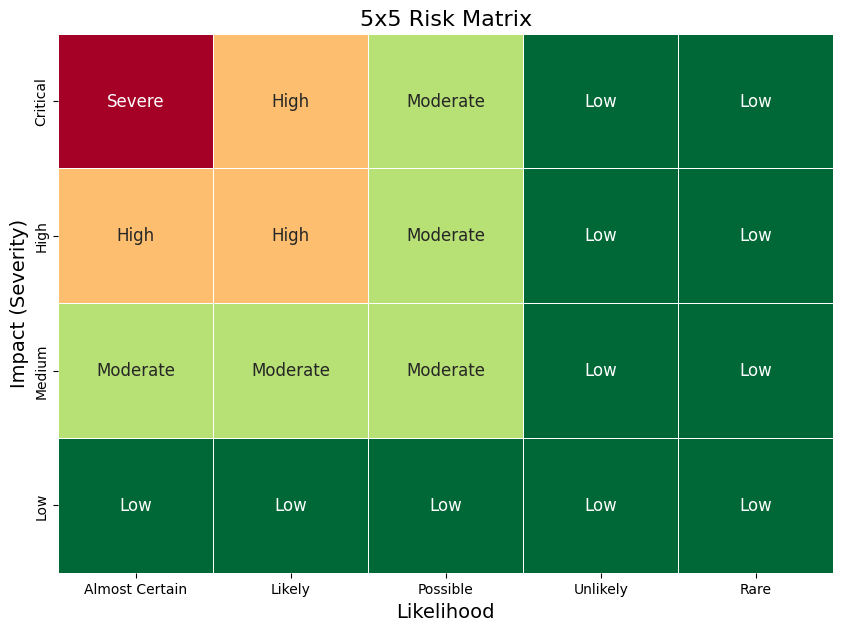

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Severity and Likelihood Levels
severity_levels = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
likelihood_levels = [0.2, 0.4, 0.6, 0.8, 1.0]  # Represents scaled likelihood scores

# Step 2: Define a 5x5 Risk Matrix
risk_matrix = pd.DataFrame(index=severity_levels, columns=likelihood_levels)

# Map Risk Scores to Matrix
def map_to_5x5_risk(row):
    severity = row['Severity Score']  # Severity as 3 (MEDIUM), 4 (HIGH), 5 (CRITICAL)
    likelihood = row['Likelihood']  # Scaled likelihood (0.2 to 1.0)

    # Determine matrix cell based on severity and likelihood
    if severity == 5 and likelihood >= 0.8:
        return 'Severe'  # RED
    elif severity >= 4 and likelihood >= 0.6:
        return 'High'  # ORANGE
    elif severity >= 3 and likelihood >= 0.4:
        return 'Moderate'  # YELLOW
    else:
        return 'Low'  # GREEN

# Apply Risk Matrix Mapping
sampled_df['Matrix Risk'] = sampled_df.apply(map_to_5x5_risk, axis=1)

# Step 3: Visualize the 5x5 Risk Matrix
matrix_data = pd.DataFrame(index=['Critical', 'High', 'Medium', 'Low'], columns=['Almost Certain', 'Likely', 'Possible', 'Unlikely', 'Rare'])
matrix_data.loc['Critical'] = ['Severe', 'High', 'Moderate', 'Low', 'Low']
matrix_data.loc['High'] = ['High', 'High', 'Moderate', 'Low', 'Low']
matrix_data.loc['Medium'] = ['Moderate', 'Moderate', 'Moderate', 'Low', 'Low']
matrix_data.loc['Low'] = ['Low', 'Low', 'Low', 'Low', 'Low']

plt.figure(figsize=(10, 7))
sns.heatmap(
    matrix_data.map(lambda x: {'Severe': 4, 'High': 3, 'Moderate': 2, 'Low': 1}[x]),
    annot=matrix_data, fmt='', cmap='RdYlGn_r', linewidths=0.5, cbar=False, annot_kws={'size': 12}
)

plt.title('5x5 Risk Matrix', fontsize=16)
plt.xlabel('Likelihood', fontsize=14)
plt.ylabel('Impact (Severity)', fontsize=14)
plt.xticks(ticks=np.arange(0.5, 5.5), labels=['Almost Certain', 'Likely', 'Possible', 'Unlikely', 'Rare'])
plt.yticks(ticks=np.arange(0.5, 4.5), labels=['Critical', 'High', 'Medium', 'Low'])
plt.show()


**5x5 Risk Matrix:**

Rows represent Severity levels (Critical, High, Medium, Low).
Columns represent Likelihood levels (Almost Certain, Likely, Possible, Unlikely, Rare).
Each cell corresponds to a Risk Category (Severe, High, Moderate, Low).
Mapping Function (map_to_5x5_risk):

Determines the appropriate Risk Category by evaluating the combination of Severity and Likelihood.

**Matrix Visualization:**

A heatmap visually represents the Risk Matrix.
The colors (from red to green) highlight risk priority:

Red: Severe
Orange: High
Yellow: Moderate
Green: Low

**Output:**
The matrix heatmap shows the distribution of risks based on the combination of Impact (Severity) and Likelihood.
The dataset now includes a Matrix Risk column, explicitly mapping risks according to the 5x5 Risk Matrix logic.